In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/nursnaaz/DataScienceMasterclass/main/03%20-%20Data%20Preprocessing/data_assignment.csv')

In [4]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
data.shape[0]

8523

In [9]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
data.duplicated().sum()

0

In [15]:
data['Item_Weight'].mean()

12.857645184135976

In [17]:
data['Item_Weight'].median()

12.6

<Axes: >

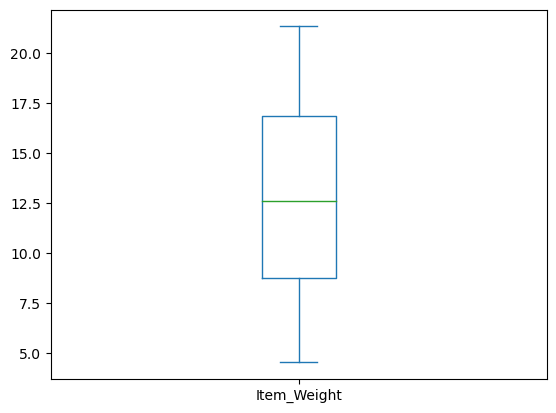

In [18]:
data['Item_Weight'].plot(kind='box')

In [19]:
data['Item_Weight'].fillna(data['Item_Weight'].median(),inplace=True)

In [20]:
data['Item_Weight'].isna().sum()

0

In [25]:
data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [31]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace=True)

In [32]:
data['Outlet_Size'].isna().sum()

0

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [39]:
#define outlier
for col_name in data.select_dtypes(include=np.number).columns[:]:
    print(col_name)
    q1=data[col_name].quantile(.25)
    q3=data[col_name].quantile(.75)
    iqr=(q3-q1)
    low=q1-(1.5*iqr)
    high=q3+(1.5*iqr)
    print(data.loc[(data[col_name]<low) | (data[col_name]>high),col_name])

Item_Weight
Series([], Name: Item_Weight, dtype: float64)
Item_Visibility
49      0.255395
83      0.293418
108     0.278974
174     0.291865
334     0.204700
          ...   
8292    0.209163
8345    0.266397
8371    0.214125
8432    0.227261
8509    0.214306
Name: Item_Visibility, Length: 144, dtype: float64
Item_MRP
Series([], Name: Item_MRP, dtype: float64)
Outlet_Establishment_Year
Series([], Name: Outlet_Establishment_Year, dtype: int64)
Item_Outlet_Sales
43      6768.5228
130     7968.2944
132     6976.2524
145     7370.4060
203     6704.6060
          ...    
8245    7549.5062
8329    6630.0364
8350    7240.5750
8447    7588.1226
8510    7182.6504
Name: Item_Outlet_Sales, Length: 186, dtype: float64


In [44]:
data_num=data.select_dtypes(include=np.number)

In [46]:
data_num

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [47]:
scaling= MinMaxScaler()

In [48]:
pd.DataFrame(scaling.fit_transform(data_num), columns = data_num.columns )

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,0.282525,0.048866,0.927507,0.583333,0.283587
1,0.081274,0.058705,0.072068,1.000000,0.031419
2,0.770765,0.051037,0.468288,0.583333,0.158115
3,0.871986,0.000000,0.640093,0.541667,0.053555
4,0.260494,0.000000,0.095805,0.083333,0.073651
...,...,...,...,...,...
8518,0.137541,0.172914,0.777729,0.083333,0.210293
8519,0.227746,0.143069,0.326263,0.708333,0.039529
8520,0.359929,0.107148,0.228492,0.791667,0.088850
8521,0.158083,0.442219,0.304939,1.000000,0.138835


In [49]:
scaling = StandardScaler()
data_scale = pd.DataFrame(scaling.fit_transform(data_num), columns = data_num.columns )

In [50]:
data_scale

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,-0.831187,-0.970732,1.747454,0.139541,0.910601
1,-1.630810,-0.908111,-1.489023,1.334103,-1.018440
2,1.108727,-0.956917,0.010040,0.139541,-0.049238
3,1.510904,-1.281758,0.660050,0.020085,-0.849103
4,-0.918719,-1.281758,-1.399220,-1.293934,-0.695373
...,...,...,...,...,...
8518,-1.407246,-0.181193,1.180783,-1.293934,0.349915
8519,-1.048835,-0.371154,-0.527301,0.497909,-0.956402
8520,-0.523639,-0.599784,-0.897208,0.736822,-0.579100
8521,-1.325628,1.532880,-0.607977,1.334103,-0.196725


In [51]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [74]:
data_cat=data.select_dtypes(exclude=np.number)

In [113]:
data_cat

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [76]:
data['Item_Identifier'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518     True
8519     True
8520     True
8521     True
8522     True
Name: Item_Identifier, Length: 8523, dtype: bool

In [77]:
data['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [78]:
data_id_cat=pd.get_dummies(data_cat['Item_Identifier'])

In [79]:
data_cat['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [80]:
data_cat['Item_Fat_Content']=data['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [82]:
data_cat['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [83]:
data_fat_cat=data_cat['Item_Fat_Content']

In [86]:
data_fat_cat=data_fat_cat.replace({'Low Fat':0,'Regular':1})

In [89]:
pd.DataFrame(data_fat_cat)

,Item_Fat_Content
0,0
1,1
2,0
3,1
4,0
...,...
8518,0
8519,1
8520,0
8521,1


In [90]:
data_cat['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [100]:
data_type_cat=pd.get_dummies(data_cat['Item_Type']).reset_index().drop(columns='index')

In [101]:
data_type_cat

,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8519,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8520,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8521,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [124]:
data_out_cat=pd.get_dummies(data_cat['Outlet_Identifier']).reset_index().drop(columns='index')

In [125]:
data_cat['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [109]:
data_size_cat=data_cat['Outlet_Size'].replace({'Small':0,'Medium':1,'High':2})

In [110]:
data_size_cat

0       1
1       1
2       1
3       1
4       2
       ..
8518    2
8519    1
8520    0
8521    1
8522    0
Name: Outlet_Size, Length: 8523, dtype: int64

In [111]:
data_cat['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [126]:
data_loc_cat=pd.get_dummies(data_cat['Outlet_Location_Type']).reset_index().drop(columns='index')

In [133]:
data_cat['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [130]:
data_cat['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [136]:
data_otype_cat=pd.get_dummies(data_cat['Outlet_Type']).reset_index().drop(columns='index')

In [137]:
data_scale = data_scale.reset_index().drop(columns = 'index')
data_id_cat=data_id_cat.reset_index().drop(columns = 'index')
data_fat_cat=data_fat_cat.reset_index().drop(columns = 'index')
data_type_cat=data_type_cat.reset_index().drop(columns = 'index')
data_out_cat=data_out_cat.reset_index().drop(columns = 'index')
data_size_cat=data_size_cat.reset_index().drop(columns = 'index')
data_loc_cat=data_loc_cat.reset_index().drop(columns = 'index')
data_otype_cat=data_otype_cat.reset_index().drop(columns = 'index')

In [139]:
new_data=pd.concat([data_scale,data_id_cat,data_fat_cat,data_type_cat,data_out_cat,data_size_cat,data_loc_cat,data_otype_cat], axis = 1)

In [140]:
new_data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,level_0,DRA12,DRA24,DRA59,DRB01,...,OUT046,OUT049,Outlet_Size,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,-0.831187,-0.970732,1.747454,0.139541,0.910601,0,0,0,0,0,...,0,1,1,1,0,0,0,1,0,0
1,-1.630810,-0.908111,-1.489023,1.334103,-1.018440,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2,1.108727,-0.956917,0.010040,0.139541,-0.049238,2,0,0,0,0,...,0,1,1,1,0,0,0,1,0,0
3,1.510904,-1.281758,0.660050,0.020085,-0.849103,3,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,-0.918719,-1.281758,-1.399220,-1.293934,-0.695373,4,0,0,0,0,...,0,0,2,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.407246,-0.181193,1.180783,-1.293934,0.349915,8518,0,0,0,0,...,0,0,2,0,0,1,0,1,0,0
8519,-1.048835,-0.371154,-0.527301,0.497909,-0.956402,8519,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8520,-0.523639,-0.599784,-0.897208,0.736822,-0.579100,8520,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
8521,-1.325628,1.532880,-0.607977,1.334103,-0.196725,8521,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [141]:
new_data=new_data.drop(columns='level_0')

In [142]:
new_data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,DRA12,DRA24,DRA59,DRB01,DRB13,...,OUT046,OUT049,Outlet_Size,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,-0.831187,-0.970732,1.747454,0.139541,0.910601,0,0,0,0,0,...,0,1,1,1,0,0,0,1,0,0
1,-1.630810,-0.908111,-1.489023,1.334103,-1.018440,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2,1.108727,-0.956917,0.010040,0.139541,-0.049238,0,0,0,0,0,...,0,1,1,1,0,0,0,1,0,0
3,1.510904,-1.281758,0.660050,0.020085,-0.849103,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,-0.918719,-1.281758,-1.399220,-1.293934,-0.695373,0,0,0,0,0,...,0,0,2,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.407246,-0.181193,1.180783,-1.293934,0.349915,0,0,0,0,0,...,0,0,2,0,0,1,0,1,0,0
8519,-1.048835,-0.371154,-0.527301,0.497909,-0.956402,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8520,-0.523639,-0.599784,-0.897208,0.736822,-0.579100,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
8521,-1.325628,1.532880,-0.607977,1.334103,-0.196725,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
